In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython 
import sklearn
print(f'{sys.version},{pd.__version__},{matplotlib.__version__}')
print(f'{np.__version__},{sp.__version__}')
print(f'{IPython.__version__},{sklearn.__version__}')

3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0],1.0.5,3.2.2
1.18.5,1.5.0
7.18.1,0.23.1


In [2]:
import mglearn
import matplotlib.pyplot as plt

# Data set for this chapter

- 'forge' data set for binary classification

In [3]:
# make a data set
X, y = mglearn.datasets.make_forge()

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


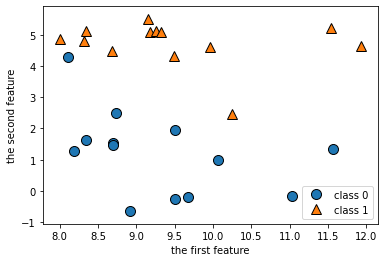

In [8]:
# draw scatter plot
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4) # the parameter 'loc' is the location of the legend
plt.xlabel("the first feature")
plt.ylabel("the second feature")
print("X.shape:", X.shape)

- 'wave' data set for regression

Text(0, 0.5, 'target')

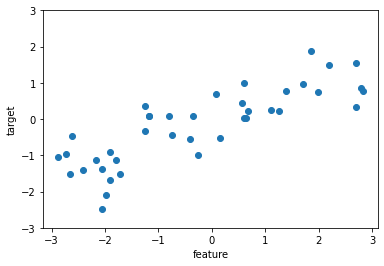

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3) # the range of y
plt.xlabel("feature")
plt.ylabel("target")

- Wisconsin Breast Cancer data set

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [19]:
print("shape of the cancer data", cancer.data.shape)

shape of the cancer data (569, 30)


In [20]:
print("the number of samples for each class:",
     {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

the number of samples for each class: {'malignant': 212, 'benign': 357}


In [21]:
print("feature names:", cancer.feature_names)

feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- Boston Housing data set

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape of the data",boston.data.shape)

shape of the data (506, 13)


## K-Nearest Neighbors (KNN)

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


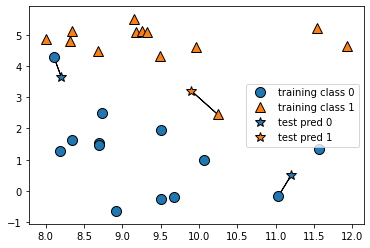

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
# the nuber of neighbor points is 1

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


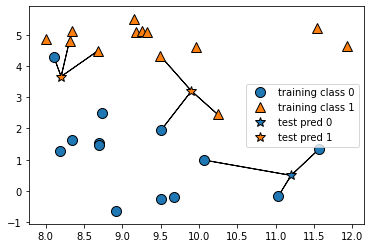

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [33]:
# split with train and test
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [34]:
# confirm the number of neigbors to 3
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [35]:
# learning the model with training set, in knn, the learning is just loading the data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# predicting with predict() method
print("test data prediction:", clf.predict(X_test))

test data prediction: [1 0 1 0 1 0 0]


In [37]:
# evaluation with test set
print(f"test set accuracy: {clf.score(X_test, y_test)}")

test set accuracy: 0.8571428571428571


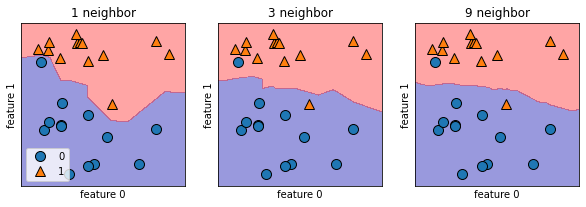

In [39]:
# Analyzing KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

#in the case the number of neighbor would be 1,3 and 9
for n_neighbors, ax in zip([1,3,9], axes): 
    # method fit() returns self object
    # so object creation and method fit() can be written in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

# and I can see decision boundary!!

- The softer decision boundary, the more simple model
- which means that less number of neighbors makes the model more complex

## KNN classification with cancer data

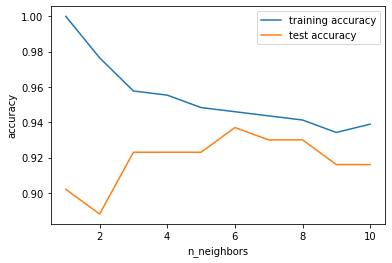

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# aply n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # model creation
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # save the training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # save the generalization(test) accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
    

- 1-NN model makes model too complex
- Meanwhile, 10-NN model makes model too simple, the accuracy going down
- So, 6-NN has the best accuracy.

## Regression with KNN

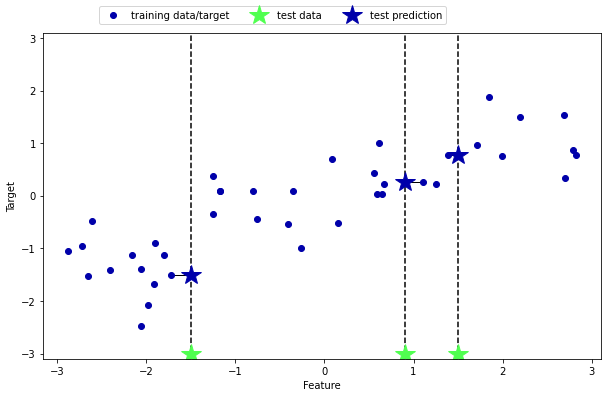

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

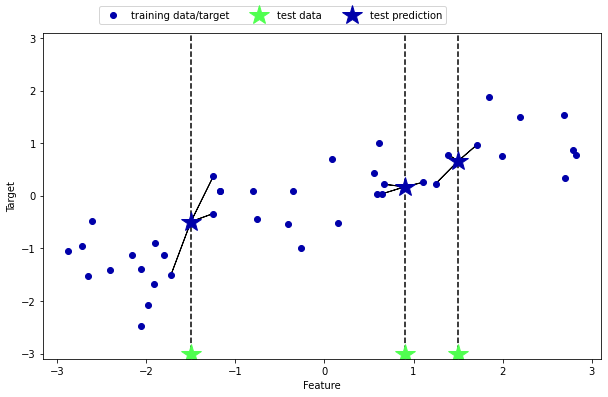

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [46]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a model object to 3-NN
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
print("test set prediction: \n", reg.predict(X_test))

test set prediction: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [48]:
# evaluation with R-square value
print("test set R-square: {:.2f}".format(reg.score(X_test, y_test)))

test set R-square: 0.83


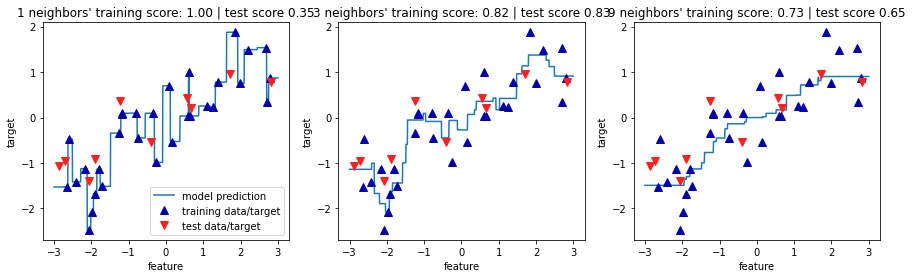

In [51]:
# Analyzing KNeighborsRegressor

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # prediction with 1,3, and 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbors' training score: {:.2f} | test score {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")

axes[0].legend(["model prediction", 
                "training data/target", "test data/target"], loc="best")   